In [1]:
import pandas as pd

df = pd.read_csv('GojekAppReviewV4.0.0-V4.9.3_Cleaned.csv')
df.head()


,userName,content,score,at,appVersion
0,Yuga Edit,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3
1,ff burik,Lambat sekali sekarang ini bosssku apk gojek g...,3,2021-11-30 15:40:38,4.9.3
2,Anisa Suci Rahmayuliani,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021-11-29 22:58:12,4.9.3
3,naoki yakuza,Baru download gojek dan hape baru trus ditop u...,1,2022-09-03 15:21:17,4.9.3
4,Trio Sugianto,Mantap,5,2022-01-15 10:05:27,4.9.3


In [2]:
df.tail()

,userName,content,score,at,appVersion
224997,Sad Gamer,Gofood Biaya lain2ya gak ngotak mending hujan2...,1,2023-02-15 09:37:58,4.0.0
224998,fadhil fadil,Yok lah,5,2021-12-11 12:28:20,4.0.0
224999,g sugiarto,Sempurna,5,2022-03-14 01:45:39,4.0.0
225000,J i H A D 'B E,GOJEK LAMA LAMA GAK JELAS LAGI PESEN MASA MAP...,1,2021-12-24 08:48:51,4.0.0
225001,Ria Heria,Good,5,2022-03-17 14:33:34,4.0.0


Find out how many rows the dataset contains and confirm that there are no missing values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225002 entries, 0 to 225001
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   userName    225002 non-null  object
 1   content     225000 non-null  object
 2   score       225002 non-null  int64 
 3   at          225002 non-null  object
 4   appVersion  225002 non-null  object
dtypes: int64(1), object(4)
memory usage: 8.6+ MB


EDA & Preprocessing

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
sum(df['appVersion'].str.startswith("4.8"))

8091

In [6]:
# ambil kolom yg dibutuhkan
df = df[df['appVersion'].str.startswith("4.8")]
df = df.loc[:, ['userName', 'content', 'score']]

df.head()

,userName,content,score
133,Abu karim aljabbar Mkatiksaidi,Ramah banget,5
134,Fathan Mubina,Setelah update kok nggak bisa dibuka,4
135,Nyauw Jin Fie,Good,5
136,Tanaka Kun,Good,5
137,Anton S.,Sangat membantu,5


In [7]:
# tokenization
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string



In [8]:
# nltk.download('punkt')
# nltk.download('stopwords')

In [9]:

# hapus duplikasi
df = df.dropna(subset=['content']).drop_duplicates()

# stopwords
stop_words = stopwords.words('indonesian') + stopwords.words('english') + ["yg", "gak", "ngisi", "udah", "d", "sih", "nya", "srg", "utk", "byk", "gk", "ga", "aja", "tp", "udh"]
df['content'] = df['content'].apply(lambda x: [word.lower() for word in word_tokenize(x) if (word.isalpha() and word.lower() not in stop_words)])

# normalisasi teks
df['content'] = df['content'].apply(lambda x: ' '.join(x))

df.head()

,userName,content,score
133,Abu karim aljabbar Mkatiksaidi,ramah banget,5
134,Fathan Mubina,update nggak dibuka,4
135,Nyauw Jin Fie,good,5
136,Tanaka Kun,good,5
137,Anton S.,membantu,5


In [10]:
# !pip install PySastrawi

In [11]:
# stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stemmer = StemmerFactory().create_stemmer()
df['content'] = df['content'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

df.head(5)

,userName,content,score
133,Abu karim aljabbar Mkatiksaidi,ramah banget,5
134,Fathan Mubina,update nggak buka,4
135,Nyauw Jin Fie,good,5
136,Tanaka Kun,good,5
137,Anton S.,bantu,5


In [12]:
# !pip install vaderSentiment

In [13]:
# labelling
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

additional_lexicon_id = {
    'kecewa': -0.4,
    'rugi': -1,
    'buruk': -0.6,
    'jelek': -0.6,
    'lelet': -0.7,
    'gagal': -0.5,
    'parah': -0.6,
    'mahal': -0.3,
    'tolong': -0.1,
    'hilang': -0.3,
    'gajelas': -0.3,
    'gj': -0.3,
    'promo': 0.6,
    'kadang': -0.1,
    'maling': -0.5,
    'ganggu': 0.3,
    'sedot': -0.5,
    'bagus': 0.5,
    'pulsa': 0,
    'potong': -1,
    'baik': 0.5,
    'kntl': -1,
    'ngelag': -0.8,
    'salah': -0.5,
    'bintang': 0,
    'benerin': -0.4,
    'lambat': -0.8,
    'siput': -0.4,
    'mati': -0.7,
    'minimal': -0.3,
    'susah': -0.6,
    'nagih': -0.6,
    'capek': -0.7,
    'kacau': -0.3,
    'tagih': -0.3,
    'mantap': 1,
    'puas': 0.9,
    'sampah': -0.5,
    'sulit': -0.6,
    'aneh': -0.4,
}

analyzer.lexicon.update(additional_lexicon_id)

df['sentimen'] = df['content'].apply(lambda x: 'Positif' if analyzer.polarity_scores(x)['compound'] > 0 else ('Negatif' if analyzer.polarity_scores(x)['compound'] < 0 else 'Netral'))

df

,userName,content,score,sentimen
133,Abu karim aljabbar Mkatiksaidi,ramah banget,5,Netral
134,Fathan Mubina,update nggak buka,4,Netral
135,Nyauw Jin Fie,good,5,Positif
136,Tanaka Kun,good,5,Positif
137,Anton S.,bantu,5,Netral
...,...,...,...,...
8219,Malik Azis,gopay mantap,5,Positif
8220,Zunus,buka aplnya hapus download beberpa kali restar...,1,Netral
8221,Mutiara Purnama,bye bye gojek alih ijo lah mantapp,1,Netral
8222,Melanie Anggi,fitur gomed ya,5,Netral


In [14]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['content'])

In [15]:
# !pip install plotly

In [16]:
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

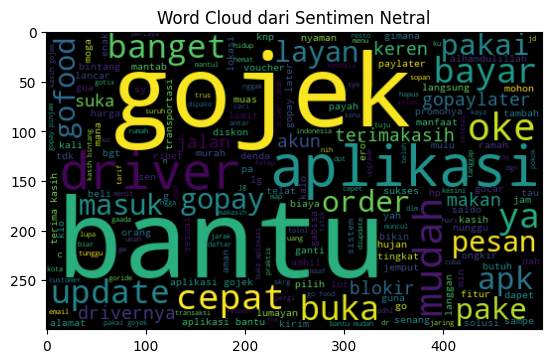

In [17]:
df_netral = df[df['sentimen'] == 'Netral']
all_words_netral = ' '.join([twts for twts in df_netral['content']])
wordcloud_netral = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_netral)

plt.imshow(wordcloud_netral, interpolation="bilinear")
# plt.axis('off')
plt.title('Word Cloud dari Sentimen Netral')
plt.show()

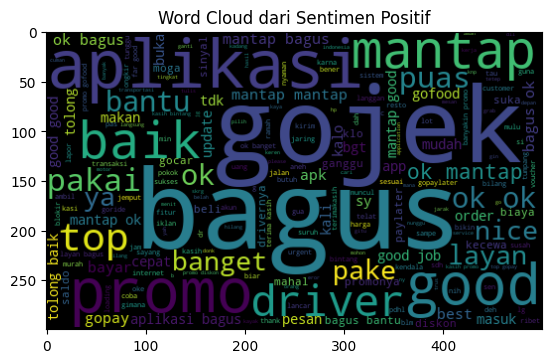

In [18]:
df_positif = df[df['sentimen'] == 'Positif']
all_words_positif = ' '.join([twts for twts in df_positif['content']])
wordcloud_positif = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_positif)

plt.imshow(wordcloud_positif, interpolation="bilinear")
# plt.axis('off')
plt.title('Word Cloud dari Sentimen Positif')
plt.show()

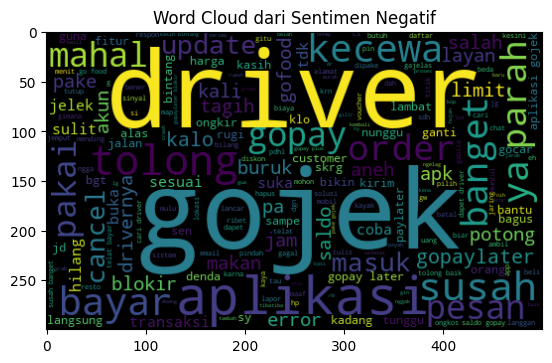

In [19]:
df_negatif = df[df['sentimen'] == 'Negatif']
all_words_negatif = ' '.join([twts for twts in df_negatif['content']])
wordcloud_negatif = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_negatif)

plt.imshow(wordcloud_negatif, interpolation="bilinear")
# plt.axis('off')
plt.title('Word Cloud dari Sentimen Negatif')
plt.show()

In [22]:
#!pip install Jinja2

  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)


In [23]:
temp = df.groupby('sentimen').count()['content'].reset_index().sort_values(by='content',ascending=False)
temp.style.background_gradient(cmap='inferno_r')

,sentimen,content
1,Netral,3987
2,Positif,2541
0,Negatif,1562


<Axes: xlabel='sentimen', ylabel='count'>

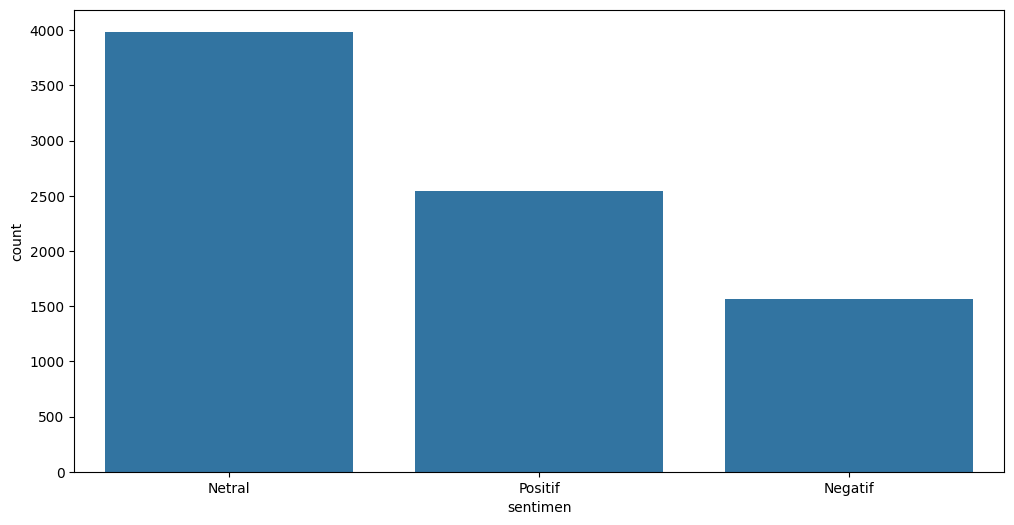

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentimen',data=df)

In [ ]:
fig = go.Figure(go.Funnelarea(
    text =temp.sentimen,
    values = temp.content,
    title = {"position": "top center", "text": "Funnel-Chart dari Distribusi target"}
    ))
fig.show()

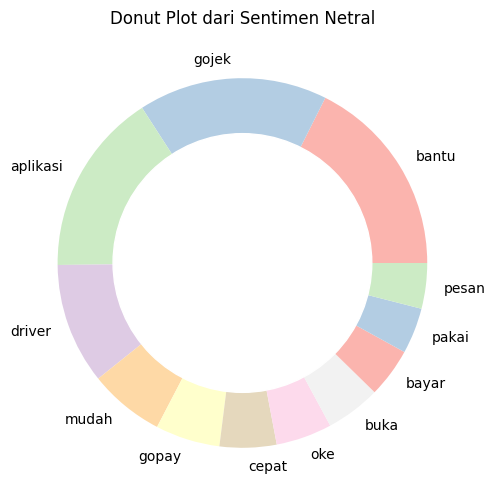

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import Pastel1

unique_netral_words = df_netral['content'].str.split(expand=True).stack().value_counts().reset_index()
unique_netral_words.columns = ['words', 'count']
top_20_words = unique_netral_words.head(12)
plt.figure(figsize=(12, 6))
my_circle = plt.Circle((0, 0), 0.7, color='white')
colors = Pastel1.colors  # Access colors from Pastel1 colormap
plt.pie(top_20_words['count'], labels=top_20_words['words'], colors=colors)
plt.gca().add_artist(my_circle)
plt.title('Donut Plot dari Sentimen Netral')
plt.show()


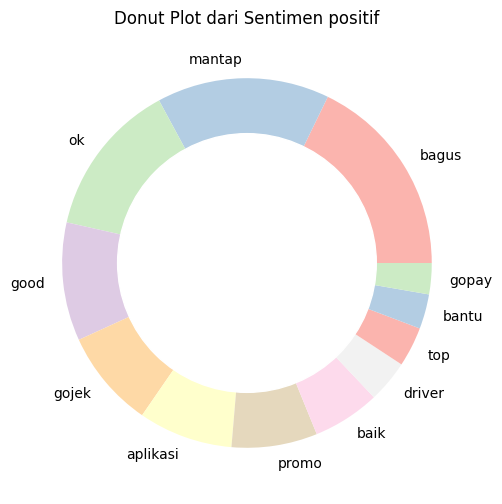

In [ ]:
unique_positif_words = df_positif['content'].str.split(expand=True).stack().value_counts().reset_index()
unique_positif_words.columns = ['words', 'count']
top_20_words = unique_positif_words.head(12)
plt.figure(figsize=(12, 6))
my_circle = plt.Circle((0, 0), 0.7, color='white')
colors = Pastel1.colors  # Access colors from Pastel1 colormap
plt.pie(top_20_words['count'], labels=top_20_words['words'], colors=colors)
plt.gca().add_artist(my_circle)
plt.title('Donut Plot dari Sentimen positif')
plt.show()

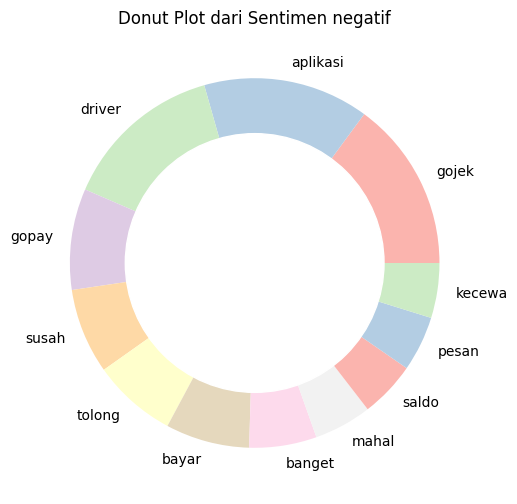

In [ ]:
unique_negatif_words = df_negatif['content'].str.split(expand=True).stack().value_counts().reset_index()
unique_negatif_words.columns = ['words', 'count']
top_20_words = unique_negatif_words.head(12)
plt.figure(figsize=(12, 6))
my_circle = plt.Circle((0, 0), 0.7, color='white')
colors = Pastel1.colors  # Access colors from Pastel1 colormap
plt.pie(top_20_words['count'], labels=top_20_words['words'], colors=colors)
plt.gca().add_artist(my_circle)
plt.title('Donut Plot dari Sentimen negatif')
plt.show()

SPLITTING

In [ ]:
# splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentimen'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((6472, 6961), (1618, 6961))

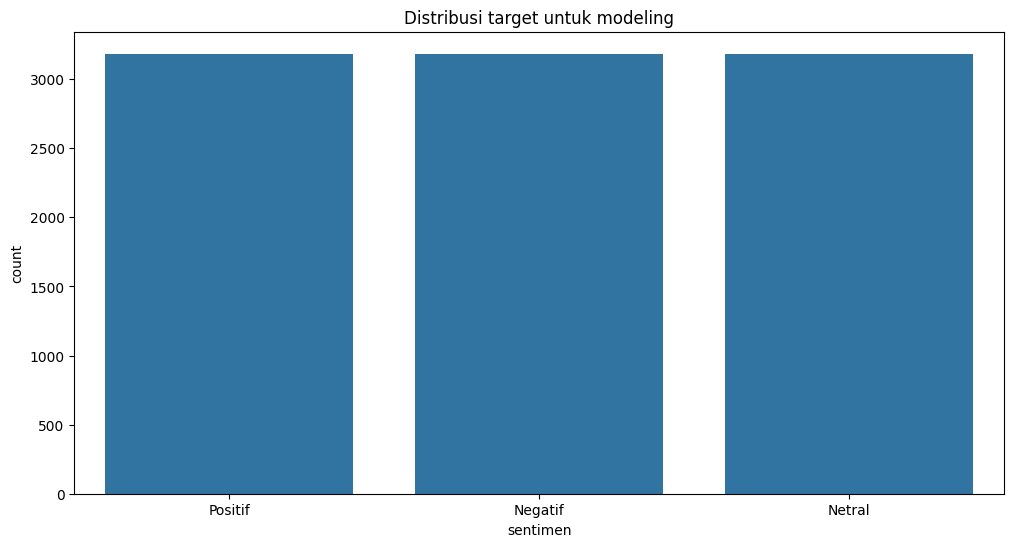

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

plt.figure(figsize=(12, 6))
sns.countplot(x=y_train)
plt.title('Distribusi target untuk modeling')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# init parameters
rf_param_grid = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

In [ ]:
rf_model = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rf_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [ ]:
# print best param
print("\nBest Parameters for Random Forest:", rf_model.best_params_)


Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}


In [ ]:
# evaluasi model
from sklearn.metrics import classification_report

y_pred_rf = rf_model.best_estimator_.predict(X_test)

print("\n\nClassification Report for Random Forest (Tuned):")
print(classification_report(y_test, y_pred_rf))



Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

     Negatif       0.85      0.92      0.89       310
      Netral       0.95      0.97      0.96       803
     Positif       0.98      0.90      0.94       505

    accuracy                           0.94      1618
   macro avg       0.93      0.93      0.93      1618
weighted avg       0.94      0.94      0.94      1618



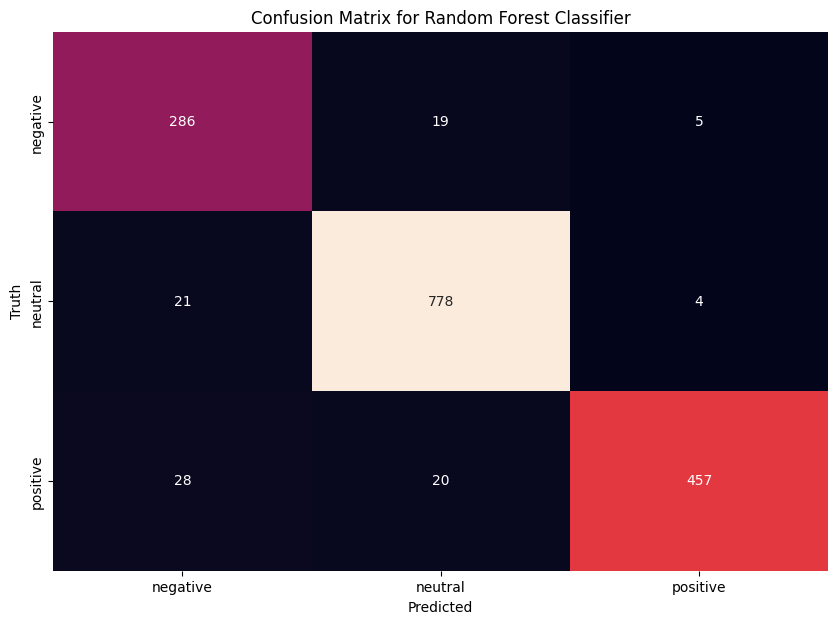

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Menggunakan model Random Forest yang telah Anda buat sebelumnya (rf_model)
y_pred_rf = rf_model.best_estimator_.predict(X_test)  # Prediksi menggunakan data uji
cm_rf = confusion_matrix(y_test, y_pred_rf)  # Menghitung confusion matrix

plt.figure(figsize=(10,7))
labels = ['negative', 'neutral', 'positive']  # Label kelas
sns.heatmap(cm_rf, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
# Normalisasi fitur
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Pemilihan Parameter K
knn_param_grid = {'n_neighbors': [3, 5, 7, 9]}  # Contoh nilai K yang akan diuji

In [ ]:
# Inisialisasi model KNN
knn_model = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy')
knn_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='accuracy')

In [ ]:
# Cetak parameter terbaik
print("\nBest Parameters for KNN:", knn_model.best_params_)


Best Parameters for KNN: {'n_neighbors': 3}


In [ ]:
# Evaluasi model
y_pred_knn = knn_model.predict(X_test_scaled)

print("\n\nClassification Report for KNN:")
print(classification_report(y_test, y_pred_knn))



Classification Report for KNN:
              precision    recall  f1-score   support

     Negatif       0.46      0.51      0.49       310
      Netral       0.75      0.68      0.71       803
     Positif       0.70      0.76      0.73       505

    accuracy                           0.67      1618
   macro avg       0.64      0.65      0.64      1618
weighted avg       0.68      0.67      0.68      1618



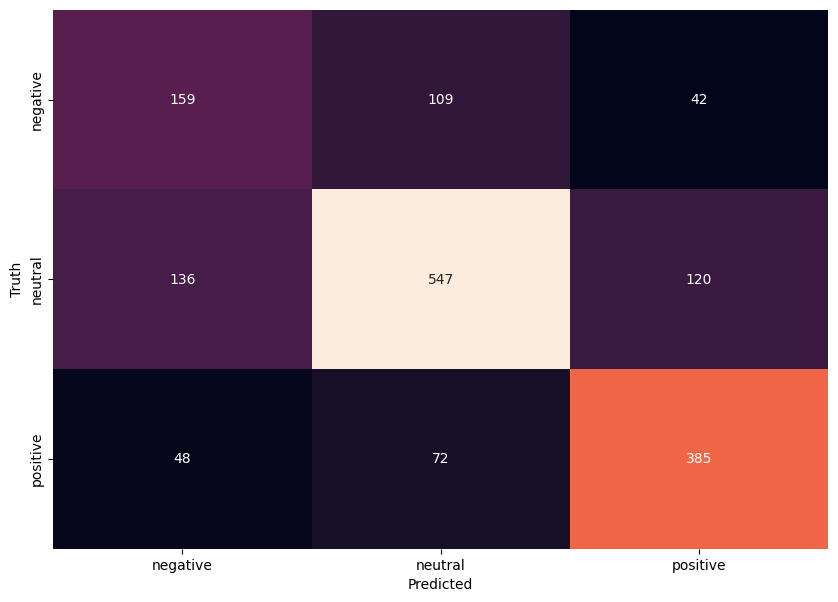

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Misalnya, Anda memiliki prediksi y_pred_knn dan ground truth y_test
# Anda perlu menghitung confusion matrix terlebih dahulu
cm = confusion_matrix(y_test, y_pred_knn)  # Ganti y_pred_knn dan y_test dengan variabel yang sesuai

plt.figure(figsize=(10,7))
labels = ['negative', 'neutral', 'positive']  # Mengganti label menjadi negatif, netral, dan positif
sns.heatmap(cm, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
# Filter data untuk hanya positif dan negatif
df_filtered = df[df['sentimen'] != 'Netral']

# Ubah label kelas menjadi biner (positif=1, negatif=0)
df_filtered['sentimen'] = df_filtered['sentimen'].apply(lambda x: 1 if x == 'Positif' else 0)

# Pisahkan fitur dan label
X = df_filtered['content']
y = df_filtered['sentimen']

In [ ]:

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Ekstraksi fitur menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
# Inisialisasi dan latih model Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [ ]:
# Prediksi menggunakan data uji
y_pred = logreg_model.predict(X_test_tfidf)

In [ ]:
# Evaluasi model
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       312
           1       0.99      0.92      0.95       509

    accuracy                           0.94       821
   macro avg       0.93      0.95      0.94       821
weighted avg       0.94      0.94      0.94       821



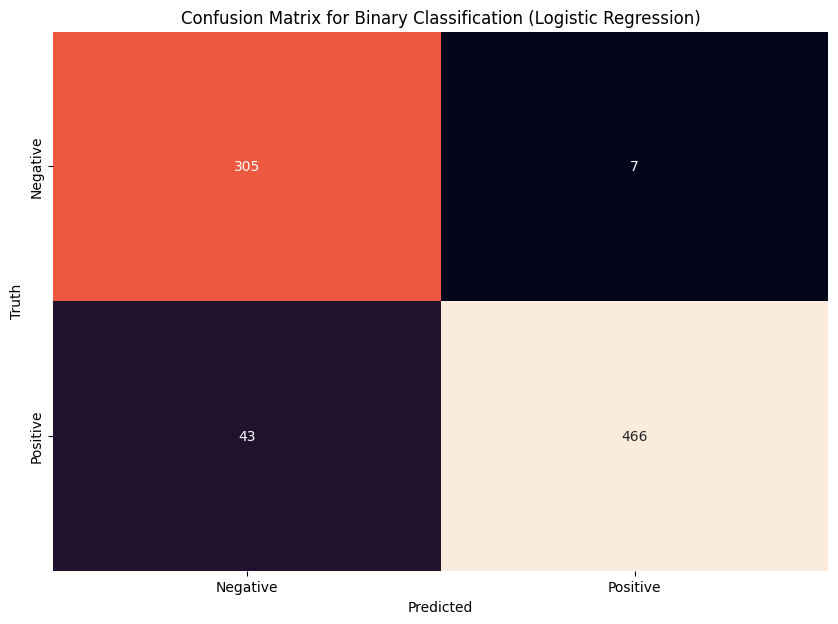

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi menggunakan model Logistic Regression
y_pred_logreg = logreg_model.predict(X_test_tfidf)
# Misalnya, Anda memiliki prediksi y_pred_logreg dan ground truth y_test
# Anda perlu menghitung confusion matrix terlebih dahulu
cm = confusion_matrix(y_test, y_pred_logreg)  # Ganti y_pred_logreg dan y_test dengan variabel yang sesuai

plt.figure(figsize=(10,7))
labels = ['Negative', 'Positive']  # Mengganti label menjadi negatif dan positif
sns.heatmap(cm, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix for Binary Classification (Logistic Regression)")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Filter data untuk hanya positif dan negatif
df_filtered = df[df['sentimen'] != 'Netral']

# Ubah label kelas menjadi biner (positif=1, negatif=0)
df_filtered['sentimen'] = df_filtered['sentimen'].apply(lambda x: 1 if x == 'Positif' else 0)

# Pisahkan fitur dan label
X = df_filtered['content']
y = df_filtered['sentimen']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ekstraksi fitur menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inisialisasi dan latih model Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, y_train)

# Inisialisasi dan latih model Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)

# Inisialisasi dan latih model KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_tfidf, y_train)

# Prediksi menggunakan model Random Forest
y_pred_rf = rf_model.predict(X_test_tfidf)

# Hitung akurasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Prediksi menggunakan model KNN
y_pred_knn = knn_model.predict(X_test_tfidf)

# Hitung akurasi model KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Prediksi menggunakan model Logistic Regression
y_pred_logreg = logreg_model.predict(X_test_tfidf)

# Hitung akurasi model Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)


[0.9086479902557856, 0.8124238733252132, 0.9390986601705238]


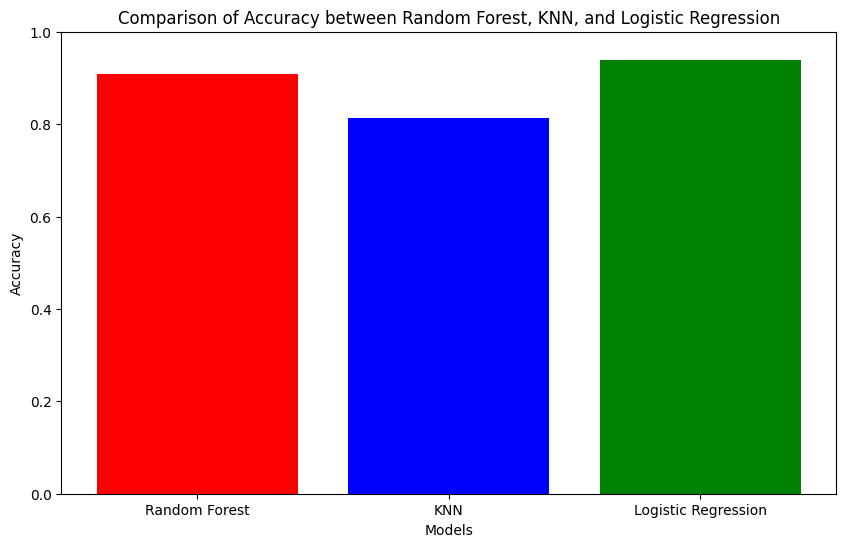

In [ ]:

# Plotting
models = ['Random Forest', 'KNN', 'Logistic Regression']
accuracies = [accuracy_rf, accuracy_knn, accuracy_logreg]
print(accuracies)
colors = ['red', 'blue', 'green']

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy between Random Forest, KNN, and Logistic Regression')
plt.ylim(0, 1)  # Set batas y-axis dari 0 hingga 1
plt.show()
